# Image filters

In [21]:
import seaborn_image as isns

isns.set_context("notebook")
isns.set_image(cmap="inferno") # set default colormap to inferno

In [22]:
pol = isns.load_image("polymer")

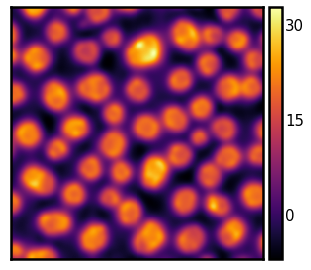

In [23]:
ax = isns.filterplot(pol, filt="gaussian", sigma=2.5)

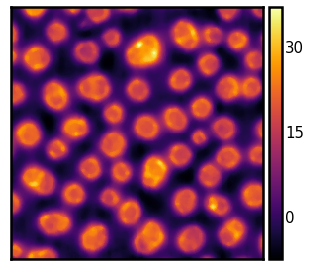

In [24]:
ax = isns.filterplot(pol, filt="median", size=5)

In [25]:
isns.implemented_filters.keys()

dict_keys(['sobel', 'gaussian', 'median', 'max', 'diff_of_gaussians', 'gaussian_gradient_magnitude', 'gaussian_laplace', 'laplace', 'min', 'percentile', 'prewitt', 'rank', 'uniform'])

## User-defined filters or any callable filter function

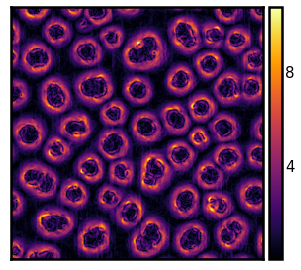

In [26]:
from skimage.filters import scharr

ax = isns.filterplot(pol, filt=scharr)

## Fast-Fourier Transform

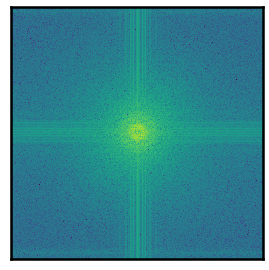

In [27]:
ax = isns.fftplot(pol)

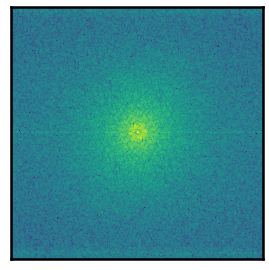

In [28]:
ax = isns.fftplot(pol, window_type="hann")

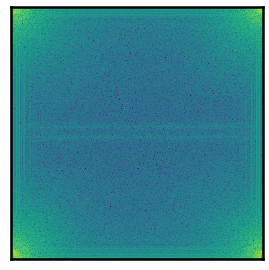

In [29]:
ax = isns.fftplot(pol, shift=False)